<h1>Feature Engineering</h1>
<hr>

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
#import dataset
df=pd.read_csv("project_files/cleaned_listings.csv")

<h1>Co-relations in the dataset</h1>

In [3]:
correlations = df.loc[:, ~df.columns.isin(['id'])].corr()

In [4]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

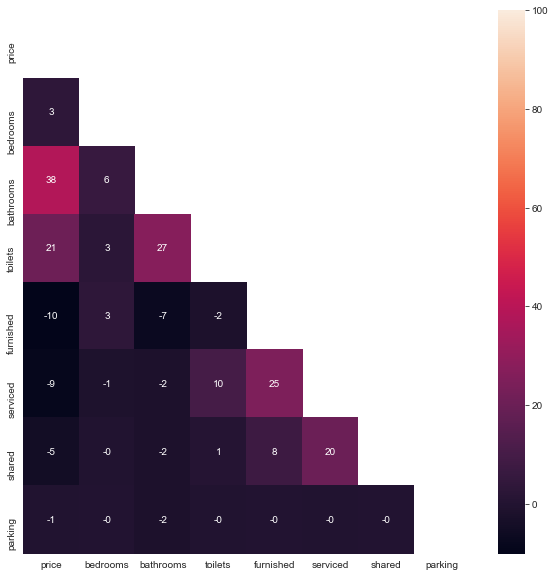

In [5]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [7]:
correlations = df.loc[(df['category']=='For Sale')].loc[:, ~df.columns.isin(['id'])].corr()

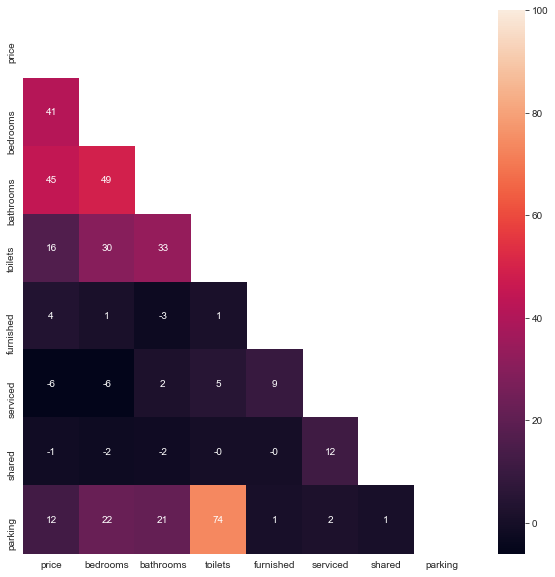

In [8]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [9]:
correlations = df.loc[(df['category']=='For Rent')].loc[:, ~df.columns.isin(['id'])].corr()

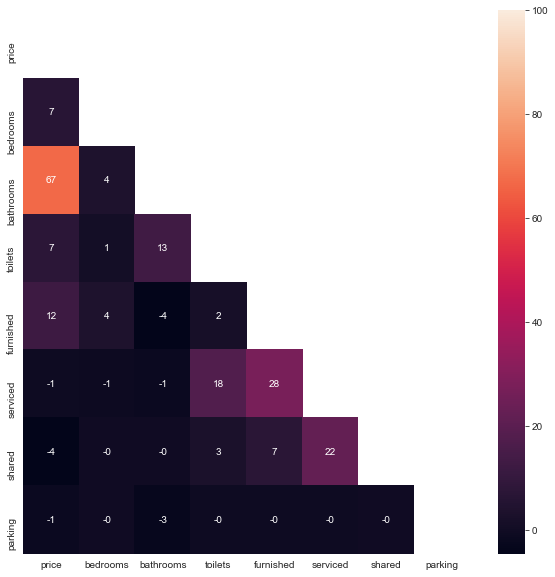

In [10]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [11]:
df.shape

(8126, 17)

In [12]:
#create a value for pre covid years
# df2['pre_covid']=df[(df['listdate'] < '2020-3-12') ].astype(int)
df['pre_covid']=( (df.listdate <= "2020-3-12")).astype(int)

In [13]:
df.sort_values(by='pre_covid').head(3)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate,pre_covid
4062,15614,500000.0,per month,5,5,6.0,0,0,0,5,For Rent,House,Missing,Nairobi,Karen,Missing,2022-05-23 22:24:42,0
5880,8929,70000000.0,Missing,4,4,5.0,0,0,0,3,For Sale,House,Missing,Nairobi,Karen,Missing,2021-07-01 16:54:52,0
5879,8923,55000000.0,Missing,4,4,4.0,0,0,0,4,For Sale,House,Missing,Nairobi,Kileleshwa,Missing,2021-07-01 12:16:47,0


In [14]:
df.sort_values(by='pre_covid').tail(3)

,id,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,sub_locality,listdate,pre_covid
5311,6280,25000000.0,Missing,3,3,0.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Westlands,Missing,2020-08-22 21:57:07,1
5335,6496,15625000.0,Missing,2,2,0.0,1,1,0,0,For Sale,Apartment,Missing,Nairobi,Kilimani,Missing,2020-08-23 14:48:58,1
0,7,200000.0,per month,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,Missing,2020-07-18 00:00:00,1


In [15]:
df.locality.value_counts()

Westlands          1363
Kilimani            690
Lavington           560
Kileleshwa          521
Nyali               488
                   ... 
Maringo               1
Eastleigh South       1
Chokaa                1
Theta                 1
Kinale                1
Name: locality, Length: 111, dtype: int64

In [24]:
# sub_df = df[df.groupby('city').city.transform('count')>3].copy() 
df[df.groupby('locality').locality.transform('count')>=20].shape

(7804, 18)

In [68]:
df[df.groupby('locality').locality.transform('count')>=75].locality.describe()

count          6918
unique           22
top       Westlands
freq           1363
Name: locality, dtype: object

In [32]:
df[df.groupby('locality').locality.transform('count')<1000].shape

In [40]:
# Save cleaned dataframe to new file
df.to_csv('project_files/analysis.csv', index=None)